**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 9**
Regresión Logística

---

*   NOMBRE: Alonso Pedrero Martínez
*   MATRÍCULA: A01769076

*   NOMBRE: Salvador D'Carlo Abad Guarro
*   MATRÍCULA: A01017779

*   NOMBRE: Gabriel Sareñana Labra
*   MATRÍCULA: A01795507

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [69]:
PATH = "../files/data.csv"
data_df = pd.read_csv(PATH)
display(data_df)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# **Parte 1**. EDA

Haz que el `id` sea el índice del dataframe y efectúa una exploración inicial de los datos a través de: 

In [70]:
data_df.set_index("id", inplace=True)



1a) Estadísticas descriptivas para todas las variables del dataframe. 

In [71]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [72]:
data_df.describe(include = "object").T

,count,unique,top,freq
diagnosis,569,2,B,357


1b) Valores únicos por variable para identificar posibles variables categóricas. 

In [73]:
data_df.nunique().sort_values(ascending=False)

smoothness_se              547
fractal_dimension_se       545
area_worst                 544
concave points_mean        542
compactness_se             541
radius_se                  540
concavity_worst            539
area_mean                  539
compactness_mean           537
concavity_mean             537
fractal_dimension_worst    535
perimeter_se               533
concavity_se               533
compactness_worst          529
area_se                    528
perimeter_mean             522
texture_se                 519
perimeter_worst            514
texture_worst              511
concave points_se          507
symmetry_worst             500
fractal_dimension_mean     499
symmetry_se                498
concave points_worst       492
texture_mean               479
smoothness_mean            474
radius_worst               457
radius_mean                456
symmetry_mean              432
smoothness_worst           411
diagnosis                    2
dtype: int64

1c) Búsqueda de valores faltantes.

In [74]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

In [75]:
missing_porcentage = ((data_df.isna().sum()/len(data_df)).round(4))*100
display(missing_porcentage)

diagnosis                  0.0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
dtype: float64

1d) Diagrama de barras para determinar la frecuencia de los diagnósticos (cantidad de observaciones con resultado benigno y maligno) 

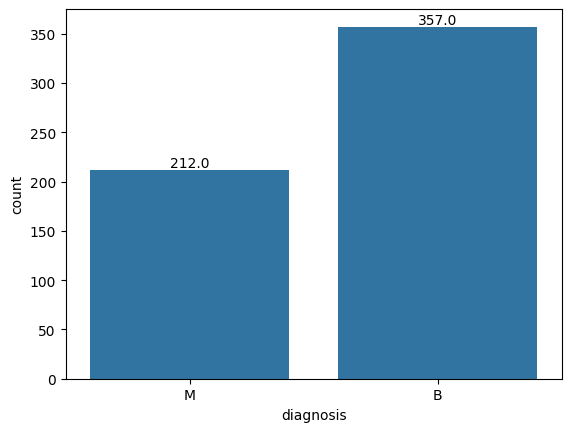

In [76]:
ax = sns.countplot(x=data_df["diagnosis"])
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha="center", va="center", xytext=(0, 5), textcoords="offset points")
plt.show()

2. Como hay tres valores relacionados con la misma característica (`mean`, `se` y `worst`) es muy probable que exista multicolinealidad en el conjunto. 

La multicolinealidad en regresión es una condición que ocurre cuando algunas variables predictoras están fuertemente correlacionadas entre sí, de tal manera que si se incluyen simultáneamente en un modelo, impiden explicar de manera correcta el efecto que cada una tiene sobre la variable respuesta. Existen muchas formas de analizar si hay colinealidad en los modelos, una de ellas es el alto coeficiente de correlación entre variables.
 
Para observar este efecto, elabora un mapa de calor que cuantifique la correlación de las variables numéricas en el dataframe. 

<Axes: >

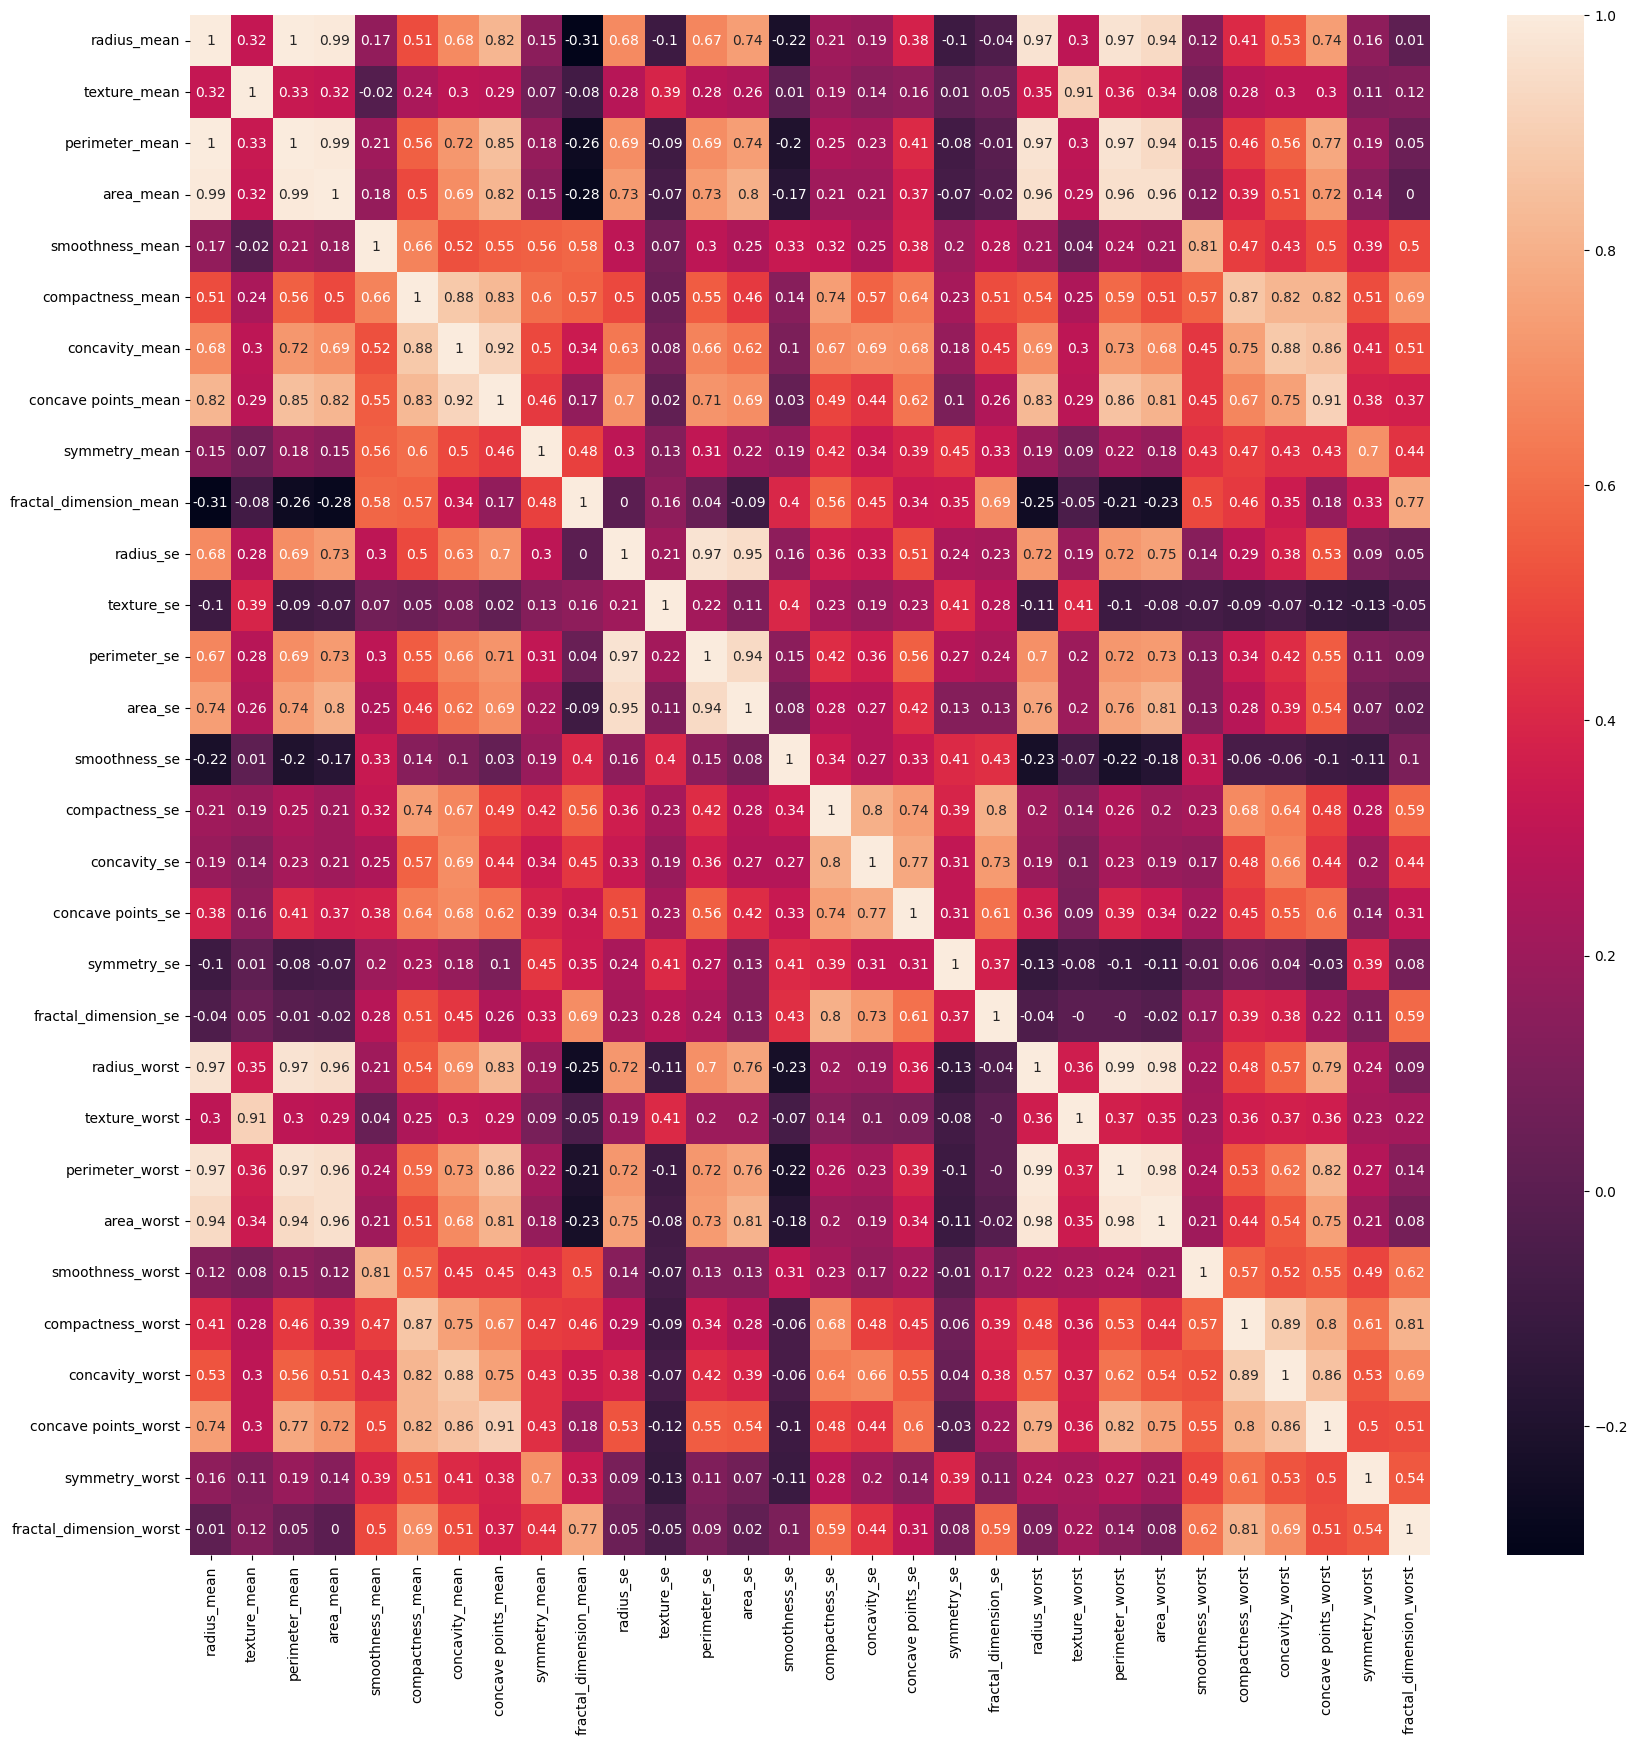

In [77]:
plt.figure(figsize = (20, 20))
sns.heatmap(round(data_df.corr(numeric_only=True),2), annot = True)

Si te fijas en los valores de correlación entre las variables `_mean` y `_worst` es evidente la multicolinearidad. 

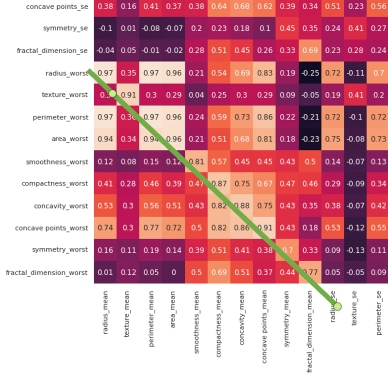

Por ejemplo, la columna `radius_mean` tiene una correlación de 0.97 con la columna `radius_worst`. Esto es algo inevitable, porque las columnas "peores" son esencialmente solo un subconjunto de las columnas "medias". 
 
Para solucionar el problema numérico de la multicolinealidad, tradicionalmente se recurre a eliminar variables o efectuar análisis de componentes principales (PCA) con las `X`’s y usar los componentes como variables independientes en un modelo final.
 
Conduciremos esta actividad en esos dos sentidos.


# **Parte 2**. Modelo con eliminación de variables altamente correlacionadas  

Elimina las variables altamente correlacionadas:

3a) Ahora que sabes que las variables `_mean` y `_worst` tienen correlación alta, hay que quitar del dataframe un conjunto. Borra las columnas `_worst`.

In [78]:
data_df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [79]:
columns_to_drop = ["radius_worst", "texture_worst",
       "perimeter_worst", "area_worst", "smoothness_worst",
       "compactness_worst", "concavity_worst", "concave points_worst",
       "symmetry_worst", "fractal_dimension_worst"]
data_df.drop(columns = columns_to_drop, inplace = True)

In [80]:
data_df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se'],
      dtype='object')

3b. Entre las variables `_mean`, identifica patrones lineales con diagramas de dispersión usando:



```Python
sns.pairplot(data=data_df[['radius_mean', 
        'texture_mean', 
        'perimeter_mean', 
        'area_mean', 
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean',
        'concave points_mean', 
        'symmetry_mean', 
        'fractal_dimension_mean']]) 
```




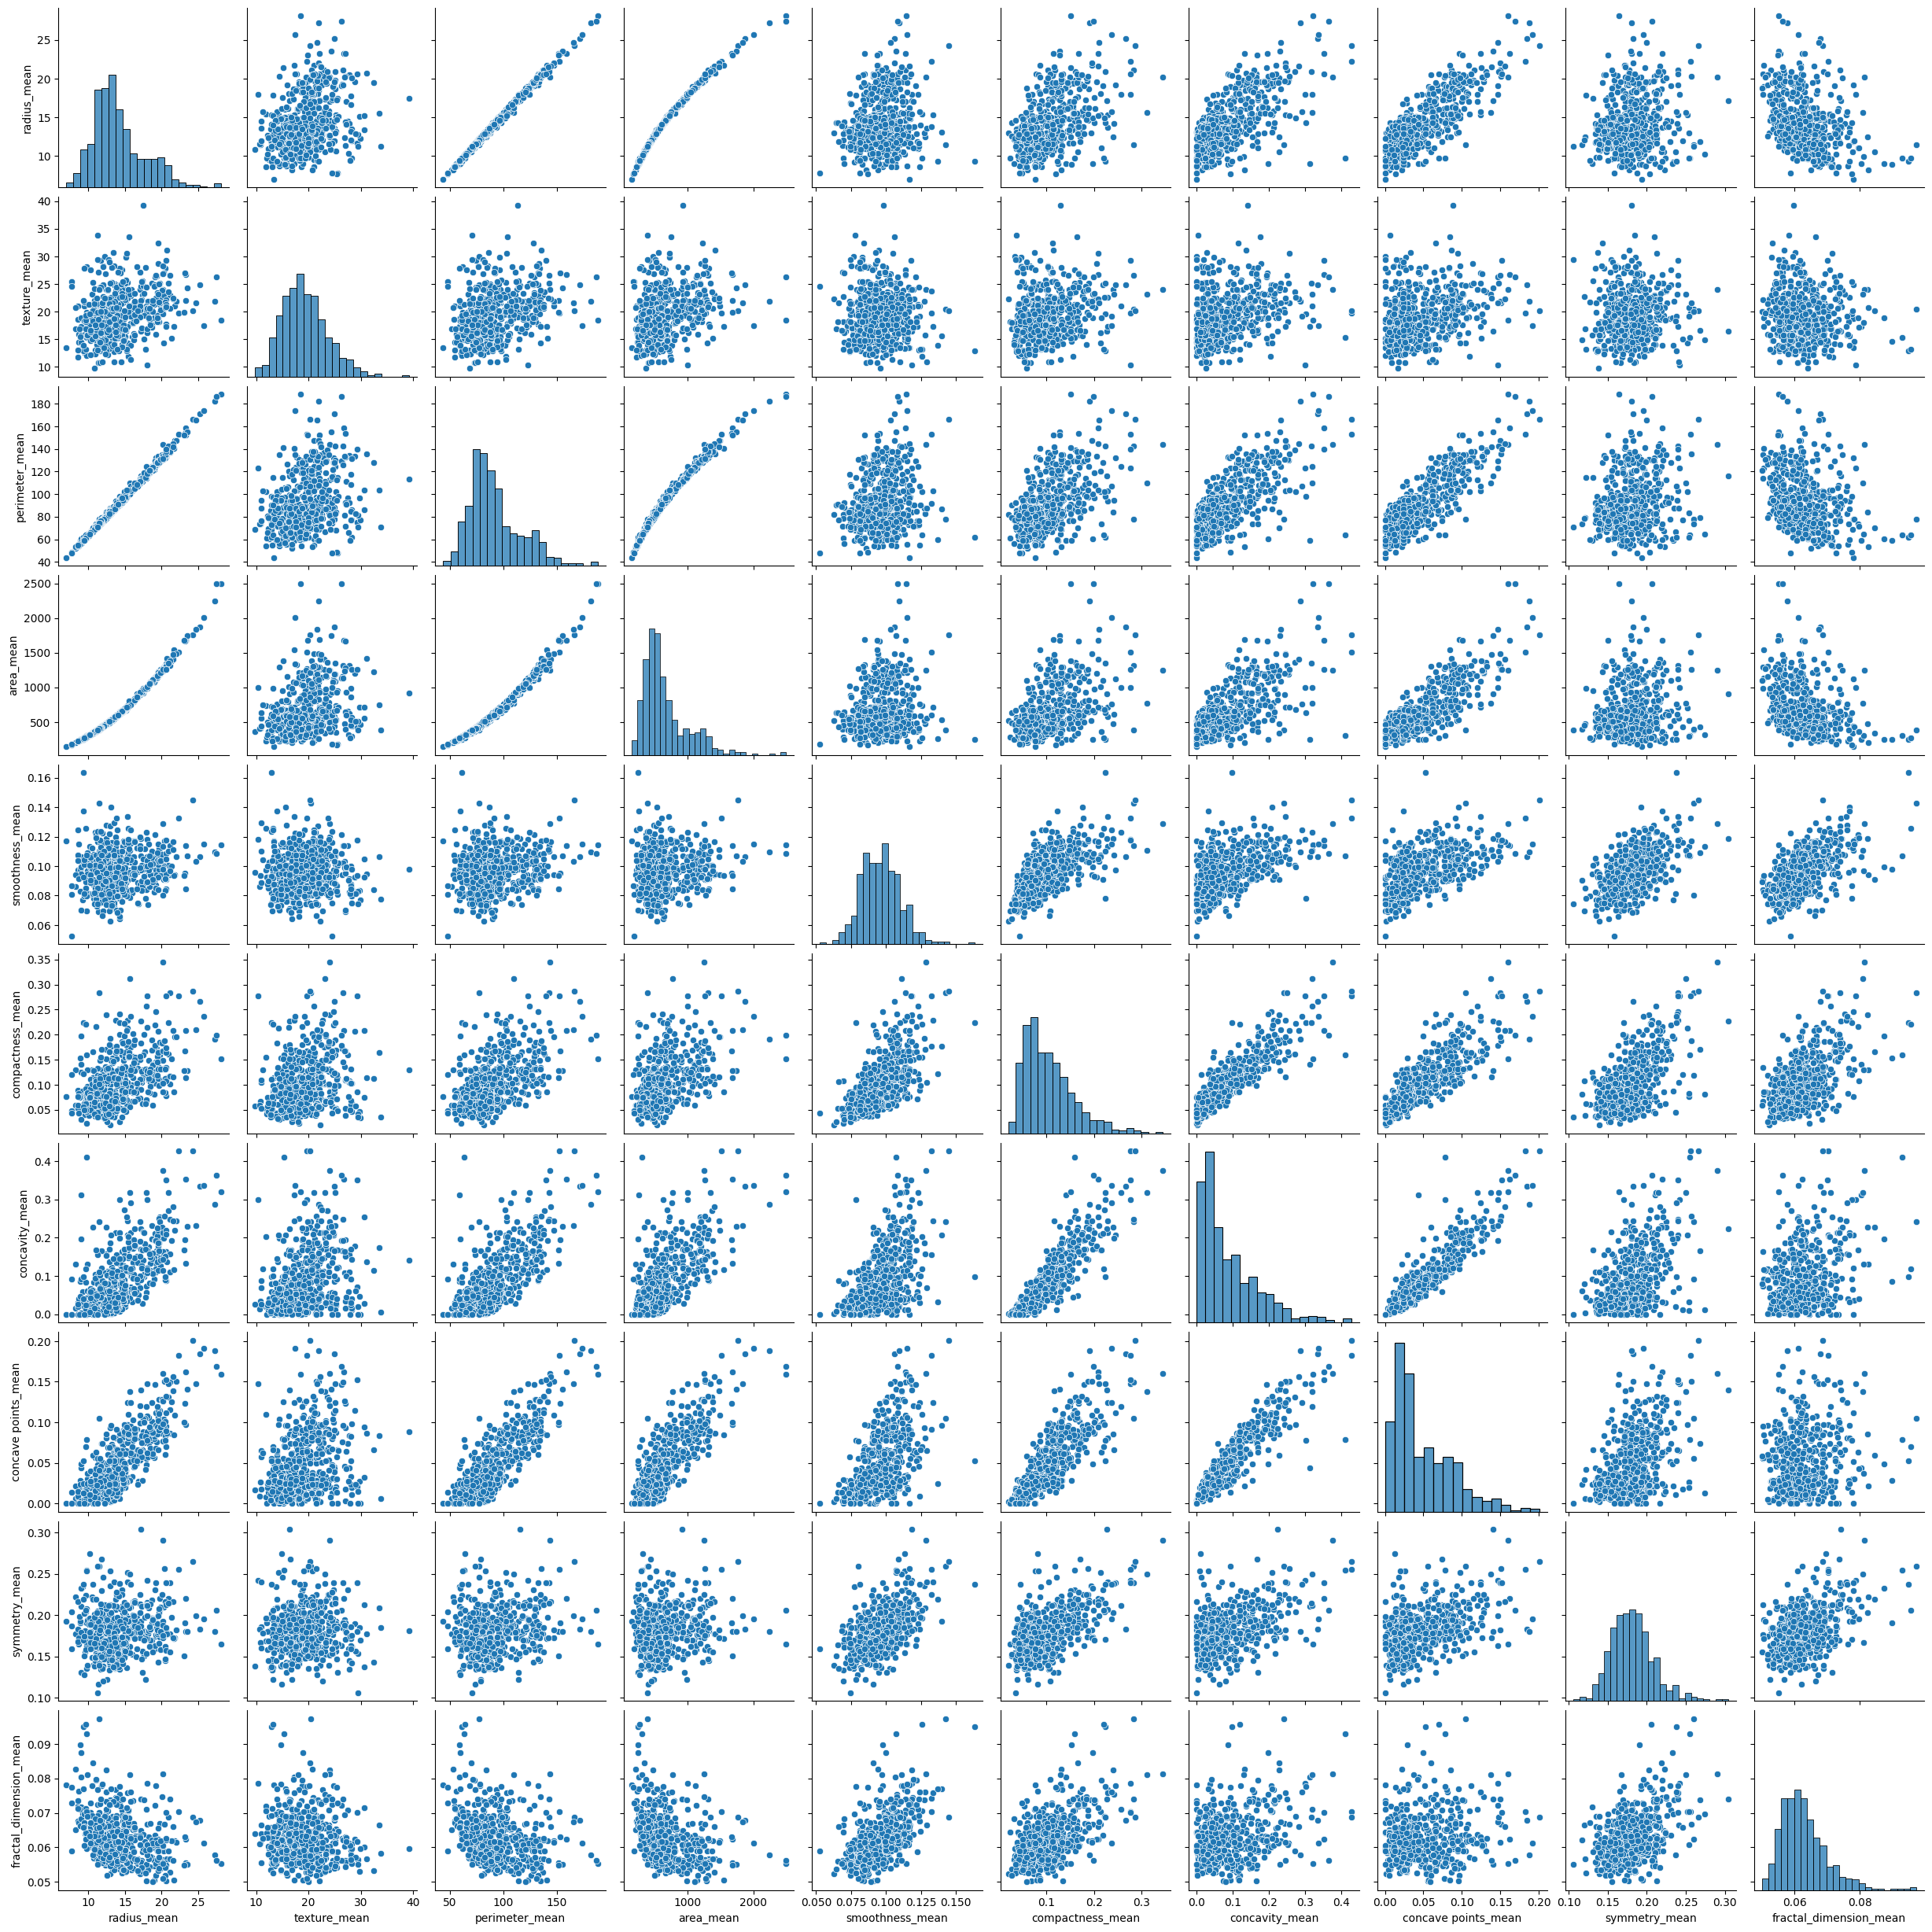

In [81]:
sns.pairplot(data=data_df[["radius_mean", 
                            "texture_mean", 
                            "perimeter_mean", 
                            "area_mean", 
                            "smoothness_mean", 
                            "compactness_mean", 
                            "concavity_mean",
                            "concave points_mean", 
                            "symmetry_mean", 
                            "fractal_dimension_mean"]]) 

De la matriz podrás observar relaciones lineales bastante evidentes entre:


*   `radius_mean`, `perimeter_mean` y `area_mean`
*   `compactness_mean`, `concavity_mean`, `concave_points_mean`
 
Sabemos que el perímetro y el área de un círculo, se calculan a partir del radio. Entonces, la relación entre las primeras tres variables es muy clara para nosotros. 

3c) Elabora otro mapa de calor confirmar con los valores de correlación.


<Axes: >

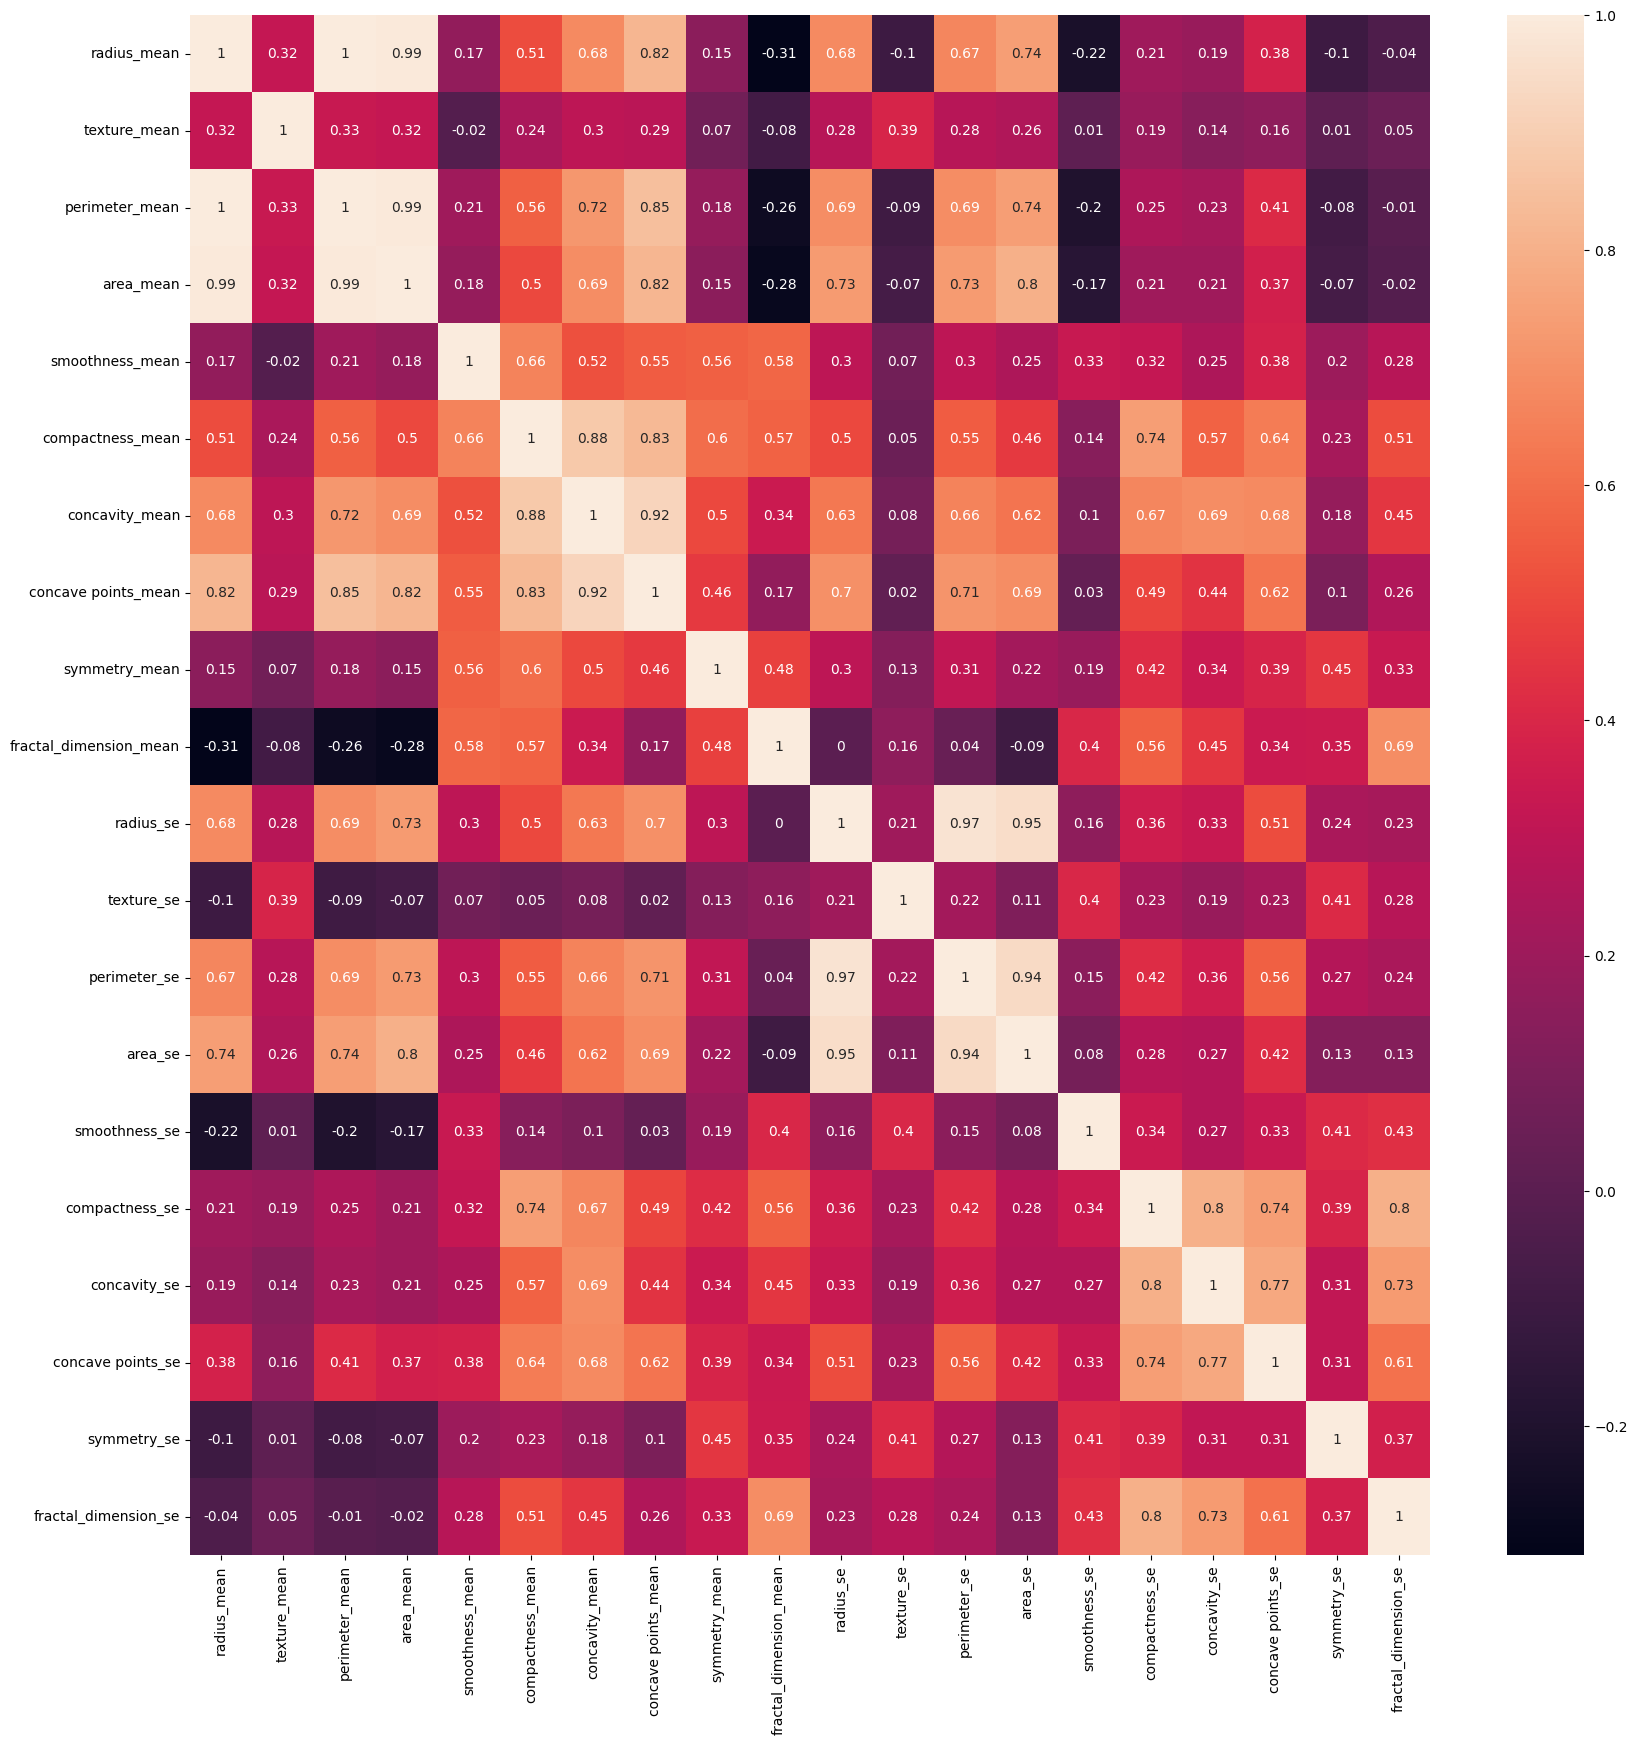

In [82]:
plt.figure(figsize = (20, 20))
sns.heatmap(round(data_df.corr(numeric_only=True),2), annot = True)

3d) Después de observar los valores, nos quedaremos con sólo una variable de cada trío: `radius_mean` y `compactness_mean`. Elimina las restantes, no sólo del conjunto `_mean`, sino también de `_se`. 

In [83]:
len(data_df.columns)

21

In [84]:
columns_to_drop = ["perimeter_mean", "concavity_mean", "area_mean", "concave points_mean",
                   "perimeter_se", "concavity_se", "area_se", "concave points_se"]
data_df.drop(columns = columns_to_drop, inplace = True)

In [85]:
len(data_df.columns)

13

Son 13 variables en el df:
- 1 variable Y (diagnosis)
- 12 variables de X

Observa la distribución de las variables resultantes (deben ser 12): 

4a) Utilizando histogramas. Guarda en una variable (`skew_cols`) las que tengan marcado sesgo positivo. Para dar seguridad a tu selección, elige aquellas cuyo resultado de aplicar la función `skew()` sea mayor a 1. 

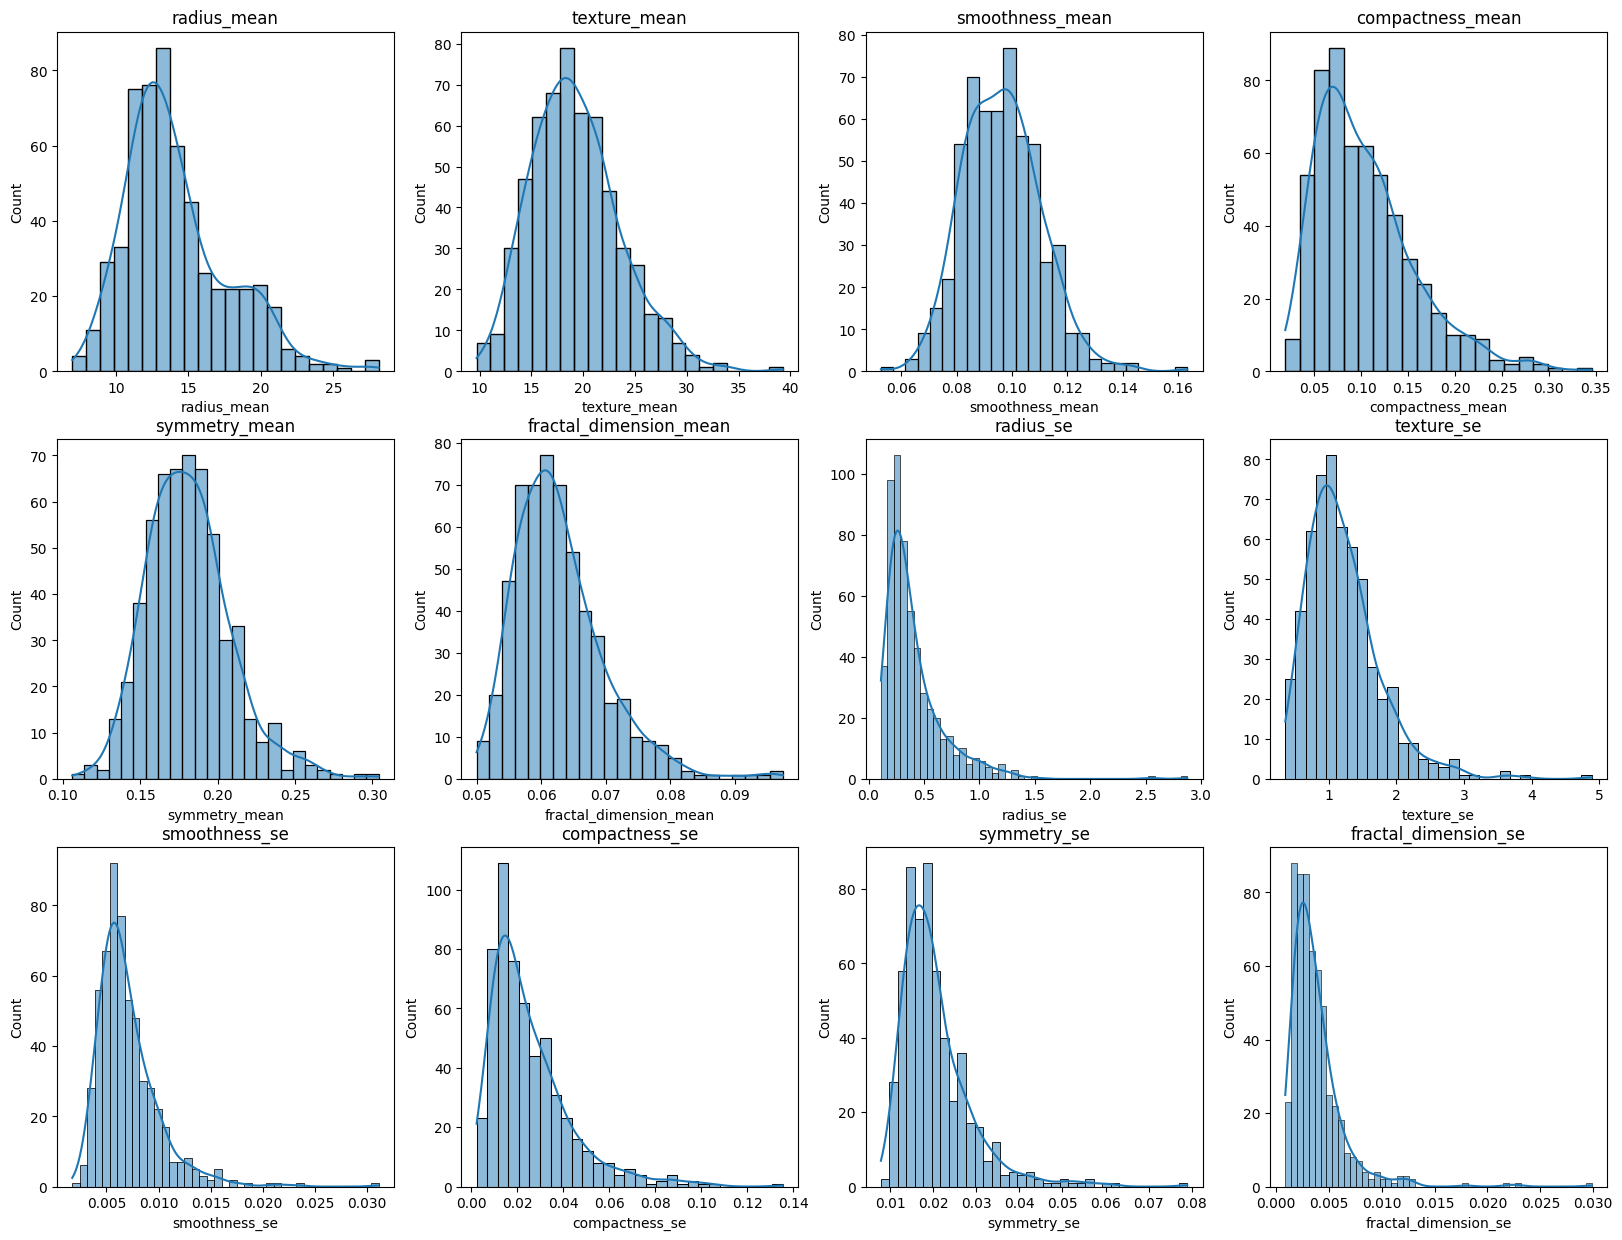

In [86]:
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

sns.histplot(x=data_df["radius_mean"], ax=axes[0, 0], kde = True)
sns.histplot(x=data_df["texture_mean"], ax=axes[0, 1], kde = True)
sns.histplot(x=data_df["smoothness_mean"], ax=axes[0, 2], kde = True)
sns.histplot(x=data_df["compactness_mean"], ax=axes[0, 3], kde = True)
sns.histplot(x=data_df["symmetry_mean"], ax=axes[1, 0], kde = True)
sns.histplot(x=data_df["fractal_dimension_mean"], ax=axes[1, 1], kde = True)
sns.histplot(x=data_df["radius_se"], ax=axes[1, 2], kde = True)
sns.histplot(x=data_df["texture_se"], ax=axes[1, 3], kde = True)
sns.histplot(x=data_df["smoothness_se"], ax=axes[2, 0], kde = True)
sns.histplot(x=data_df["compactness_se"], ax=axes[2, 1], kde = True)
sns.histplot(x=data_df["symmetry_se"], ax=axes[2, 2], kde = True)
sns.histplot(x=data_df["fractal_dimension_se"], ax=axes[2, 3], kde = True)

axes[0, 0].set_title("radius_mean")
axes[0, 1].set_title("texture_mean")
axes[0, 2].set_title("smoothness_mean")
axes[0, 3].set_title("compactness_mean")
axes[1, 0].set_title("symmetry_mean")
axes[1, 1].set_title("fractal_dimension_mean")
axes[1, 2].set_title("radius_se")
axes[1, 3].set_title("texture_se")
axes[2, 0].set_title("smoothness_se")
axes[2, 1].set_title("compactness_se")
axes[2, 2].set_title("symmetry_se")
axes[2, 3].set_title("fractal_dimension_se")

plt.show()

In [87]:
skew_cols = data_df.copy(deep = True)
skew_cols.drop(columns = "diagnosis", inplace = True)
skew_cols.skew()

radius_mean               0.942380
texture_mean              0.650450
smoothness_mean           0.456324
compactness_mean          1.190123
symmetry_mean             0.725609
fractal_dimension_mean    1.304489
radius_se                 3.088612
texture_se                1.646444
smoothness_se             2.314450
compactness_se            1.902221
symmetry_se               2.195133
fractal_dimension_se      3.923969
dtype: float64

Columnas sesgadas

In [88]:
delete_skewness_columns = ["radius_mean", "texture_mean", "smoothness_mean", "symmetry_mean"]
skew_cols.drop(columns = delete_skewness_columns, inplace = True)
skew_cols.skew()

compactness_mean          1.190123
fractal_dimension_mean    1.304489
radius_se                 3.088612
texture_se                1.646444
smoothness_se             2.314450
compactness_se            1.902221
symmetry_se               2.195133
fractal_dimension_se      3.923969
dtype: float64

Columnas no sesgadas

In [89]:
not_skew_cols = data_df.copy(deep=True)
not_skew_cols.drop(columns="diagnosis", inplace=True)
not_skew_columns = ["radius_mean", "texture_mean", "smoothness_mean", "symmetry_mean"]

columns_to_drop = [col for col in not_skew_cols.columns if col not in not_skew_columns]
not_skew_cols.drop(columns=columns_to_drop, inplace=True)
not_skew_cols.skew()

radius_mean        0.942380
texture_mean       0.650450
smoothness_mean    0.456324
symmetry_mean      0.725609
dtype: float64

4b) Dibujando box plots de todas las variables. Guarda en una variable (`scale_cols`) aquellas que no se encuentren en el intervalo [0,1]


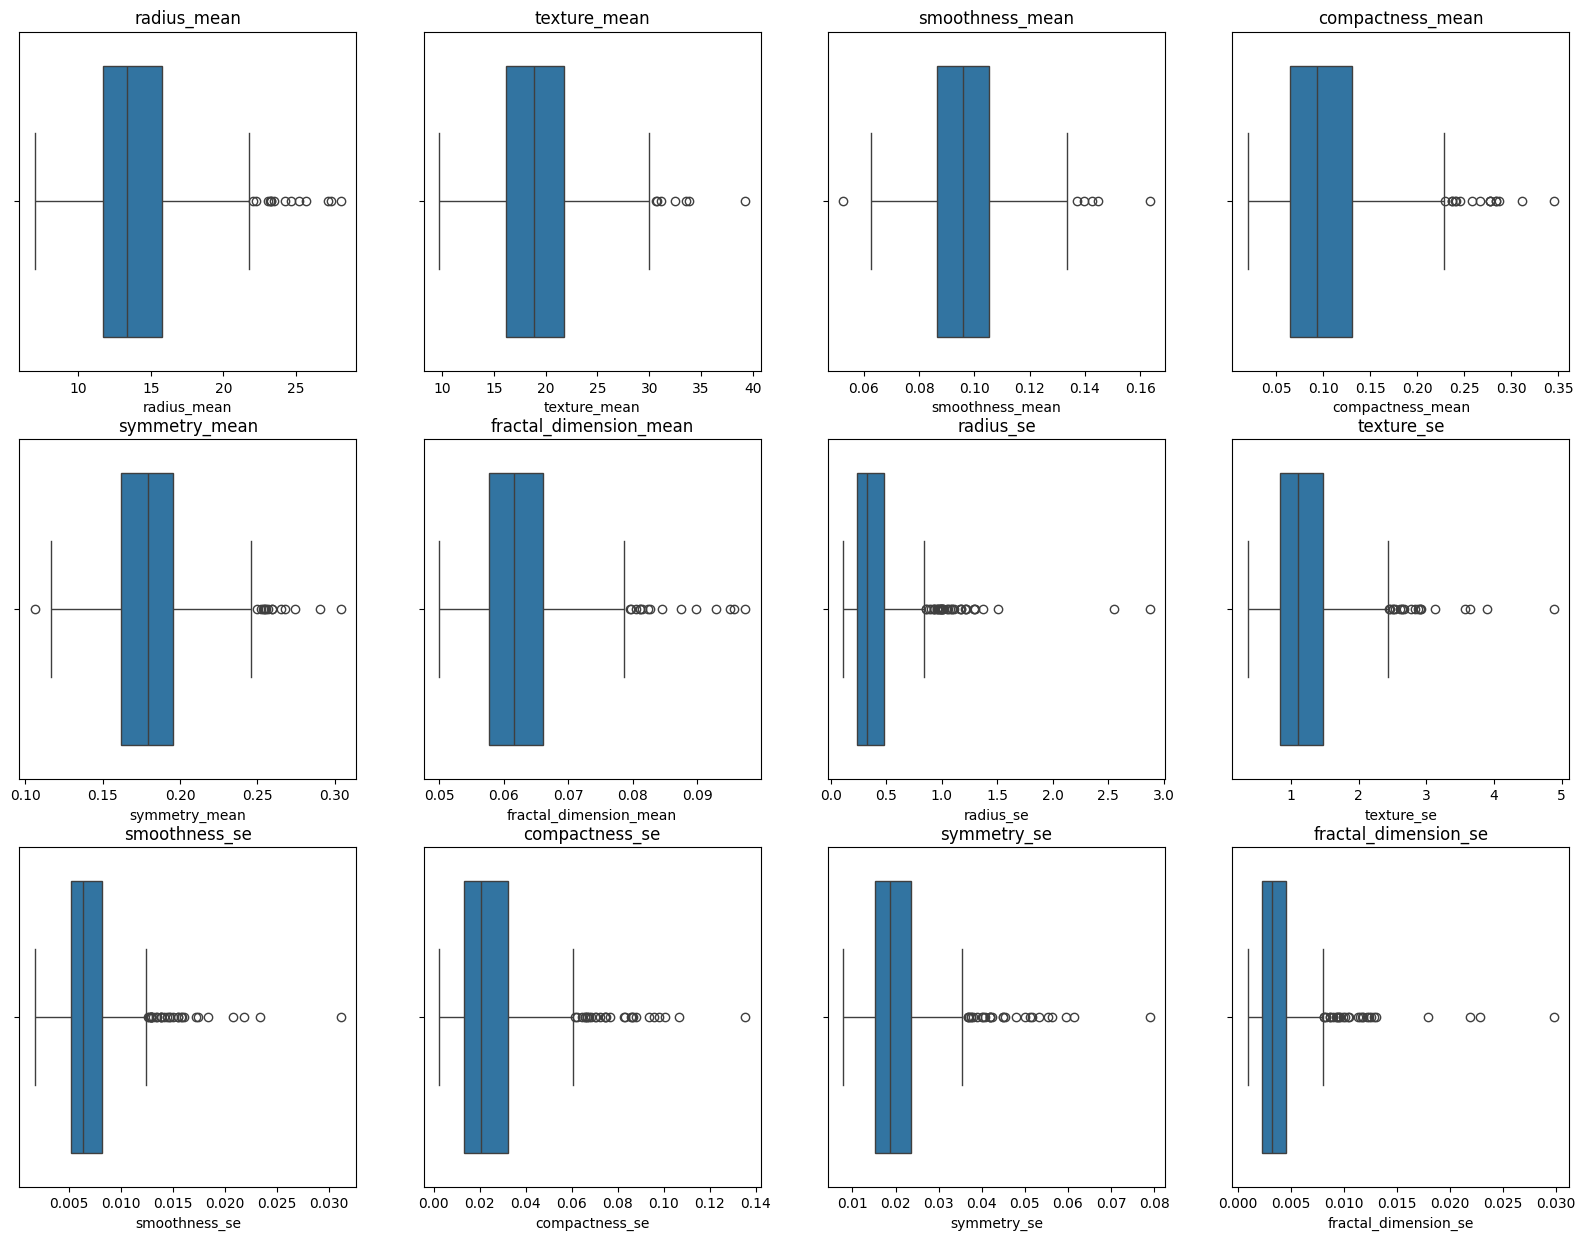

In [90]:
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

sns.boxplot(x=data_df["radius_mean"], ax=axes[0, 0])
sns.boxplot(x=data_df["texture_mean"], ax=axes[0, 1])
sns.boxplot(x=data_df["smoothness_mean"], ax=axes[0, 2])
sns.boxplot(x=data_df["compactness_mean"], ax=axes[0, 3])
sns.boxplot(x=data_df["symmetry_mean"], ax=axes[1, 0])
sns.boxplot(x=data_df["fractal_dimension_mean"], ax=axes[1, 1])
sns.boxplot(x=data_df["radius_se"], ax=axes[1, 2])
sns.boxplot(x=data_df["texture_se"], ax=axes[1, 3])
sns.boxplot(x=data_df["smoothness_se"], ax=axes[2, 0])
sns.boxplot(x=data_df["compactness_se"], ax=axes[2, 1])
sns.boxplot(x=data_df["symmetry_se"], ax=axes[2, 2])
sns.boxplot(x=data_df["fractal_dimension_se"], ax=axes[2, 3])

axes[0, 0].set_title("radius_mean")
axes[0, 1].set_title("texture_mean")
axes[0, 2].set_title("smoothness_mean")
axes[0, 3].set_title("compactness_mean")
axes[1, 0].set_title("symmetry_mean")
axes[1, 1].set_title("fractal_dimension_mean")
axes[1, 2].set_title("radius_se")
axes[1, 3].set_title("texture_se")
axes[2, 0].set_title("smoothness_se")
axes[2, 1].set_title("compactness_se")
axes[2, 2].set_title("symmetry_se")
axes[2, 3].set_title("fractal_dimension_se")

plt.show()

In [91]:
scale_cols = data_df.copy(deep = True)
scale_cols.drop(columns = "diagnosis", inplace = True)

In [92]:
scale_cols.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744
radius_se,569.0,0.405172,0.277313,0.111500,0.232400,0.324200,0.478900,2.87300
texture_se,569.0,1.216853,0.551648,0.360200,0.833900,1.108000,1.474000,4.88500
smoothness_se,569.0,0.007041,0.003003,0.001713,0.005169,0.006380,0.008146,0.03113
compactness_se,569.0,0.025478,0.017908,0.002252,0.013080,0.020450,0.032450,0.13540


In [93]:
scale_columns_keep = ["radius_mean", "texture_mean", "radius_se", "texture_se"]
scale_cols = scale_cols[scale_columns_keep]
scale_cols.columns

Index(['radius_mean', 'texture_mean', 'radius_se', 'texture_se'], dtype='object')

'radius_mean', 'texture_mean', 'radius_se', 'texture_se' son las columnas que no tienen la misma escala

Con todo el análisis anterior, estamos listos para generar un modelo *baseline* denominado `logr_model`. Para ello:

5a) Vuelve a leer el contenido del archivo, haz que el `id` sea el índice y separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`diagnosis`). Divide el conjunto en entrenamiento y prueba (80:20) considerando el parámetro `random_state` con el valor de 1.

In [94]:
PATH = "../files/data.csv"
data_df = pd.read_csv(PATH)
display(data_df)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [95]:
data_df.set_index("id", inplace=True)

In [96]:
data_df["diagnosis"] = data_df["diagnosis"].replace({"M": 1, "B": 0})
y = data_df["diagnosis"]
display(y)

id
842302      1
842517      1
84300903    1
84348301    1
84358402    1
           ..
926424      1
926682      1
926954      1
927241      1
92751       0
Name: diagnosis, Length: 569, dtype: int64

In [97]:
X = data_df.loc[:, data_df.columns != "diagnosis"]
display(X)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

5b) Prepara un transformador, denominado `preprocessing`, para borrar las columnas altamente correlacionadas (las 18 variables que se determinaron en los ejercicios previos) Asegúrate de incluir el parámetro `remainder='passthrough'` para mantener el resto de las variables.

In [99]:
previous_columns_to_drop = ["radius_worst", "texture_worst",
       "perimeter_worst", "area_worst", "smoothness_worst",
       "compactness_worst", "concavity_worst", "concave points_worst",
       "symmetry_worst", "fractal_dimension_worst","perimeter_mean",
       "concavity_mean", "area_mean", "concave points_mean",
                   "perimeter_se", "concavity_se", "area_se", "concave points_se"]
len(previous_columns_to_drop)

18

In [100]:
preprocessing = ColumnTransformer(
    [("drop", "drop", previous_columns_to_drop)], 
    remainder = "passthrough")

5c) Entrena el modelo `logr_model` con el transformador `preprocessing` y  regresión logística. 

Como la salida `y` está en términos de las etiquetas `'B'` y `'M'`, en lugar de 0 y 1, para evaluar el modelo en el conjunto de prueba deberás especificar la clase positiva. En el caso de la matriz de confusión, indica el orden de las etiquetas con `labels=['B','M']`, porque `'B'` es la clase negativa (ésta se especifica primero) y `'M'` la positiva. Para las métricas de *recall* y *precision*, utiliza el parámetro `pos_label='M'`. Como *accuracy* ocupa la suma de ambas clases y el total de las observaciones, no requiere ninguna especificación. Si quisieras omitir estos parámetros, tendrías que sustituir `'B'` por 0 y `'M'` por 1, previo a la construcción del modelo. 

In [101]:
logr_model = make_pipeline(preprocessing, LogisticRegression())
logr_model.fit(X_train, y_train)
y_predict = logr_model.predict(X_test)

print('Precision = TP / (TP + FP) = ', precision_score(y_test, y_predict))
print('Recall = TP / (TP + FN) = ', recall_score(y_test, y_predict)) 

Precision = TP / (TP + FP) =  0.8888888888888888
Recall = TP / (TP + FN) =  0.7619047619047619


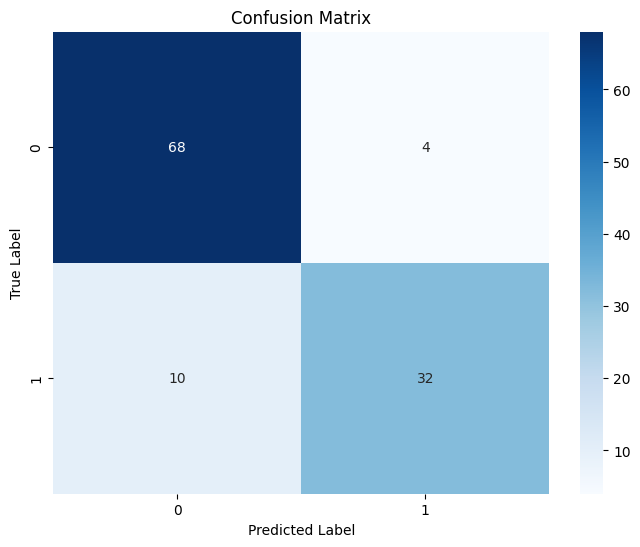

In [102]:
conf_matrix = confusion_matrix(y_test, y_predict)
class_labels = ['0', '1']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Para generar un modelo `logr_model2` con transformación y escalamiento:

6a) Modifica el transformador anterior para, además del borrado de las columnas correlacionadas, aplicar la raíz cuadrada a los predictores con sesgo (previamente almacenados en `skew_cols`) y escalamiento *MinMax* a los predictores con escala mayor a 1 (previamente almacenados en `scale_cols`) Como no todos los predictores serán eliminados o transformados, asegúrate de incluir el parámetro `remainder='passthrough'` 

In [103]:
skew_columns = skew_cols.columns
scale_columns = scale_cols.columns

In [104]:
sqrt_transform = FunctionTransformer(np.sqrt)

preprocessing = ColumnTransformer(
    transformers=[
        ("drop", "drop", previous_columns_to_drop),
        ("sqrt", sqrt_transform, skew_columns),
        ("num_preprocess", MinMaxScaler(), scale_columns)
    ],
    remainder="passthrough"
)

6b) Entrena el modelo `logr_model2` con regresión logística, aplicando previamente el transformador modificado. Evalúa el modelo en el conjunto de prueba con las mismas métricas.

In [105]:
logr_model2 = make_pipeline(preprocessing, LogisticRegression())
logr_model2.fit(X_train, y_train)
y_predict = logr_model2.predict(X_test)

print('Precision = TP / (TP + FP) = ', precision_score(y_test, y_predict))
print('Recall = TP / (TP + FN) = ', recall_score(y_test, y_predict)) 

Precision = TP / (TP + FP) =  1.0
Recall = TP / (TP + FN) =  0.7380952380952381


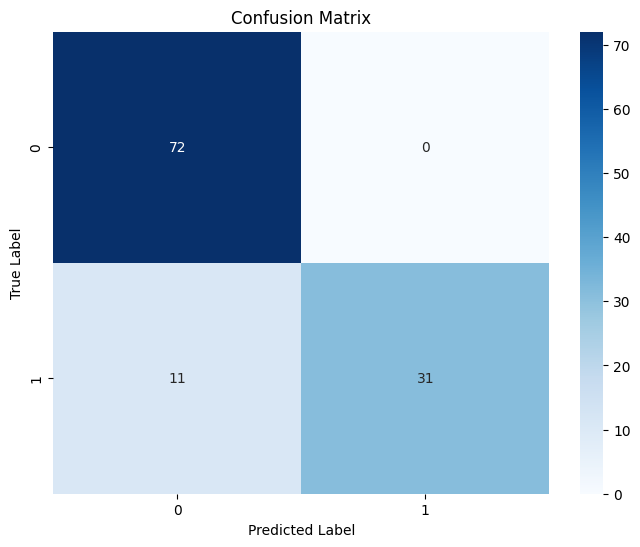

In [106]:
conf_matrix = confusion_matrix(y_test, y_predict)
class_labels = ['0', '1']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# **Parte 3**. Modelo con aplicación de PCA 

7. Analizaremos el efecto de aplicar PCA a todas las variables. Recuerda que previo a aplicarlo es recomendado escalar todas las variables. Utiliza la clase `StandardScaler` para transformar `X`.

In [107]:
escalar = StandardScaler()
X_scaled = escalar.fit_transform(X)
pca = PCA()
x_projected = pca.fit_transform(X_scaled)

8. Aplica PCA al conjunto escalado y determina el número de componentes que explican el 99% de la varianza. 

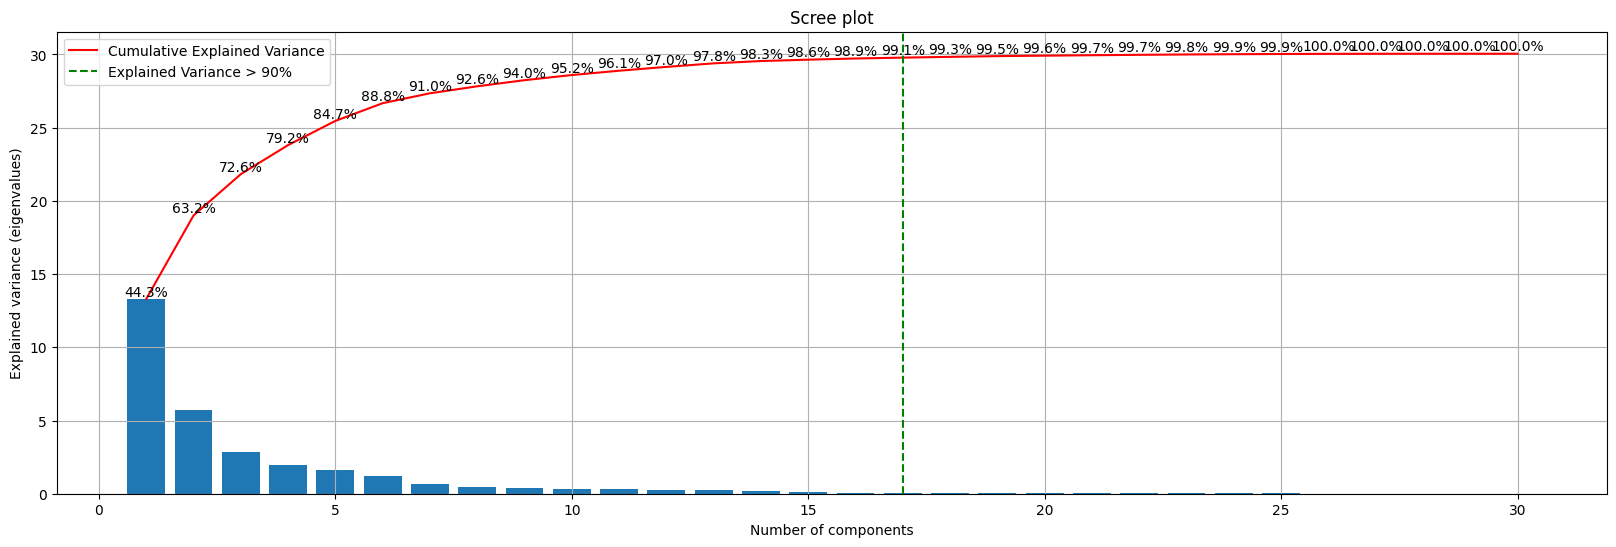

In [113]:
plt.bar(range(1, len(pca.explained_variance_) + 1),
        pca.explained_variance_)

plt.plot(range(1, len(pca.explained_variance_) + 1),
            np.cumsum(pca.explained_variance_),
            c='red',
            label='Cumulative Explained Variance')

labels = np.cumsum(pca.explained_variance_ratio_) * 100
for i in range(len(labels)):
    plt.text(i + 1, np.cumsum(pca.explained_variance_)[i], f'{labels[i]:.1f}%', ha='center', va='bottom')

index_90 = np.where(np.cumsum(pca.explained_variance_ratio_) > 0.99)[0][0]
plt.axvline(x=index_90 + 1, color='green', linestyle='--', label='Explained Variance > 90%')

plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eigenvalues)')
plt.title('Scree plot')
plt.grid(True)
plt.gcf().set_size_inches(20, 6)
plt.show()

In [115]:
index_90 = np.where(np.cumsum(pca.explained_variance_ratio_) > 0.99)[0][0]
num_components_90 = index_90 + 1
print("Número de componentes para una explained variance > 90%:", num_components_90)

Número de componentes para una explained variance > 90%: 17


En el componente 17 se describe el 99% de la varianza explicada

9. Con el número de componentes determinado, estamos listos para generar un modelo `logr_model3` con PCA. Construye un pipeline que incluya el escalamiento estándar, el PCA con el número de componentes determinado y regresión logística. Entrena el modelo utilizando el  conjunto de entrenamiento y evalúalo en el conjunto de prueba con las mismas métricas.

In [109]:
preprocessing = ColumnTransformer(
    transformers=[
        ("scalar", StandardScaler(), slice(0, X_train.shape[1])),
        ("pca", PCA(n_components=17), slice(0, X_train.shape[1]))
    ]
)

In [110]:
logr_model3 = make_pipeline(preprocessing, LogisticRegression())
logr_model3.fit(X_train, y_train)
y_predict = logr_model3.predict(X_test)

print('Precision = TP / (TP + FP) = ', precision_score(y_test, y_predict))
print('Recall = TP / (TP + FN) = ', recall_score(y_test, y_predict)) 

Precision = TP / (TP + FP) =  1.0
Recall = TP / (TP + FN) =  0.9285714285714286


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


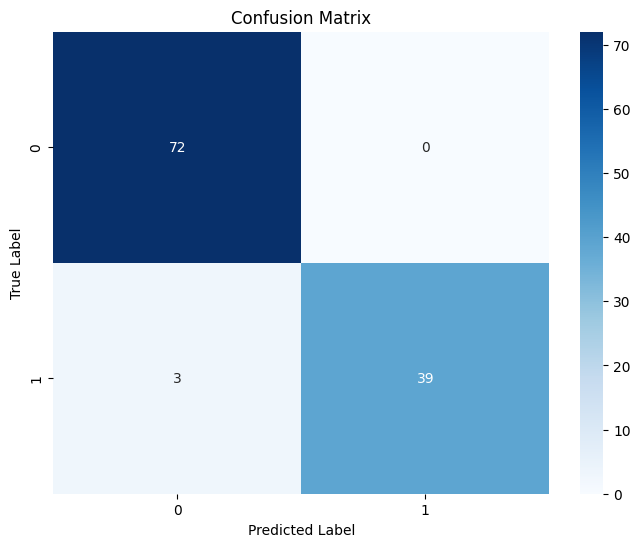

In [111]:
conf_matrix = confusion_matrix(y_test, y_predict)
class_labels = ['0', '1']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

10. En un modelo de diagnóstico médico, ¿cuál consideras que es la métrica más importante? ¿Cómo cambiarías (disminuir/aumentar) el *threshold*? ¿Por qué? 

D'Carlo:

- En un modelo de diagnóstico médico, la métrica más importante suele depender de la naturaleza de la enfermedad y de las consecuencias asociadas con los falsos positivos y falsos negativos. Sin embargo, una métrica comúnmente considerada crítica en este contexto es la sensibilidad (recall), especialmente cuando se trata de enfermedades graves.

- Sensibilidad (Recall): Es la capacidad del modelo para identificar correctamente los casos positivos (por ejemplo, pacientes con la enfermedad). La sensibilidad se calcula como el cociente entre los verdaderos positivos y la suma de verdaderos positivos y falsos negativos. Una alta sensibilidad significa que el modelo tiene una baja tasa de falsos negativos, lo cual es crucial en diagnósticos médicos para no pasar por alto casos positivos reales.

- Cambios en el Threshold: El threshold es el valor que determina la frontera entre clasificar una instancia como positiva o negativa. Ajustar el threshold puede influir en el equilibrio entre sensibilidad y precisión del modelo.

- Disminuir el Threshold (menos estricto): Esto aumentaría la sensibilidad del modelo, lo que significa que capturaría más casos positivos, pero también podría aumentar la tasa de falsos positivos. En el contexto médico, podría ser útil para garantizar que se detecten la mayoría de los casos de la enfermedad, incluso a expensas de algunos falsos positivos.

- Aumentar el Threshold (más estricto): Esto mejoraría la precisión del modelo, disminuyendo la tasa de falsos positivos, pero también podría reducir la sensibilidad y aumentar la tasa de falsos negativos. En el ámbito médico, esto podría ser preferible si se busca minimizar los diagnósticos incorrectos y se acepta perder algunos casos positivos.

- La elección del threshold debe equilibrarse cuidadosamente según los objetivos clínicos, la gravedad de la enfermedad y las consecuencias asociadas con los errores de clasificación. En algunos casos, es posible que se prefiera un threshold que maximice la sensibilidad, mientras que en otros casos podría ser más apropiado optimizar la precisión o encontrar un equilibrio mediante técnicas como la curva ROC o la curva de precisión y sensibilidad.

Gabriel:

- En un modelo de diagnóstico médico, la métrica más importante suele ser el "recall" o sensibilidad, especialmente para la clase positiva (en este caso, los diagnósticos de cáncer maligno). Esto se debe a que queremos minimizar los falsos negativos, es decir, no queremos pasar por alto a los pacientes que realmente tienen la enfermedad.

- Para cambiar el umbral (threshold), podrías disminuirlo si deseas aumentar el recall, ya que esto haría que el modelo sea más propenso a clasificar los casos como positivos. Sin embargo, esto podría aumentar los falsos positivos. Por el contrario, podrías aumentar el umbral si deseas ser más conservador y reducir los falsos positivos, pero esto podría reducir el recall.

- La elección de cómo ajustar el umbral dependerá de la importancia relativa de minimizar los falsos negativos frente a los falsos positivos en el contexto específico del diagnóstico médico.

Alonso:
- En el caso de un diágnóstico médico considero que la variable más importante para un diagnóstico médico es la variable recall ya que esta también puede ser conocida como una tasa de sensibilidad de verdaderos positivos ya que esta nos comunica cuantos casos son positivos de manera correcta. Hay veces en las cuales el no diagnosticarlo como un caso positivo puede ser extremadamente perjudicial para la salud (como lo puede ser el cáncer o en el caso de la pandemia, poder estar contagiando a más gente por no tomar medidas correctas). 

- Para disminuir el treshold se tiene que tener en cuenta que si se abre mucho, se serán más estrictas las predicciones pero se clasifican de forma correcta porque el modelo está muy seguro pero si se disminuye mucho se pueden predecir más casos como positivos aunque no se esté el modelo tans eguro. Para este caso considero que el diagnosticarlos como positivos aunque no lo sean puede ser más beneficioso para los pacientes ya que se pueden tomar más medidas para la salud de los pacientes que no hacer nada y si el modelo no está tan seguro, incluir una segunda opinion para que se haga el tratamiento correcto y en caso que haya sido un falso positivo, la secuela que puede ser tratable es la salud mental de la persona al tener un susto relacionado con su salud.